In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
import itertools
import collections 
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy
from figure_dict import *
import os

import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LogNorm
%matplotlib inline 
plt.style.use('figures')

temp = 30C
experiment = titration 

In [3]:
#Input
dirIn = "input/CD-titration/"

#description 
fname = "SsMutant"
temp =30

#Output
dirOut = "output/CD-titration/"
experiment = "Titration"
fout = dirOut+experiment+'-spectra.pdf'
fout2 = dirOut+experiment+'-Fapp-spectra.pdf'
ddGout = dirOut+experiment+'-ddG.csv'
addout = dirOut+experiment+'-additivity.csv'
combinedout = dirOut+experiment+'-ddG-additivity.csv'
dGplotout = dirOut+experiment+'-bargraph-dG.pdf'
ddGplotout = dirOut+experiment+'-bargraph-ddG.pdf'
addplotout = dirOut+experiment+'-bargraph-additivity.pdf'


In [4]:
urea = {}
MREdata = {}
urea_model = {}
model = {}
urea_residual = {}
residual = {}
gni = {}
gni_err = {}
giu = {}
giu_err = {}
gtotal = {} 
gtotal_err = {} 
fapp_model = {} 
fapp_MREdata = {} 

#read in list of files, use to get proteins  
protlist = []
minvalue = 10000
maxvalue = -10000


Inputs are CD spectra and their fits determined using Savuka

In [5]:
filelist = [x for x in os.listdir(dirIn) if x.endswith(".xlsx")]

In [6]:
for line in filelist:
    line = line.strip()
    _, p, _, _ = line.split('-')
    if (p != "SsWT"):
        p = p[2:]
    
    protlist.append(p)
    xls = pd.ExcelFile(dirIn+line)
    df = xls.parse('fit') #titration values and fit
    urea[p] = df.iloc[:,0].dropna().values
    #temp = np.divide(df.iloc[:,2].dropna().values,1000)
    MREdata[p] = np.divide(df.iloc[:,2].dropna().values,1000)
    urea_model[p] = df.iloc[:,4].dropna().values
    model[p] = np.divide(df.iloc[:,6].dropna().values,1000)
    urea_residual[p] = df.iloc[:,8].dropna().values
    residual[p] = np.divide(df.iloc[:,9].dropna().values,1000)
    tempmin = min(np.divide(df.iloc[:,9].dropna().values,1000))
    tempmax = max(np.divide(df.iloc[:,9].dropna().values,1000))
    if  tempmin < minvalue:
        minvalue = tempmin
    if  tempmax > maxvalue:
        maxvalue = tempmax
    df2 = xls.parse('dg', header = None) #dg only
    gni[p] = df2.iloc[0,1] #row, column
    gni_err[p] = df2.iloc[0,2] 
    giu[p] = df2.iloc[1,1] 
    giu_err[p] = df2.iloc[1,2] 
    gtotal[p] = df2.iloc[0,1] + df2.iloc[1,1] 
    
    gni_u = ufloat(gni[p], gni_err[p])
    giu_u = ufloat(giu[p], giu_err[p])
    gtot_u = gni_u + giu_u
    
    gtot_u = '{:.6f}'.format(gtot_u)
    gtot_u, gtot_u_err = gtot_u.split("+/-")
    print (gtot_u_err)
    gtotal_err[p] = float(gtot_u_err)
    
    fapp_model[p] = (model[p]-min(model[p]))/(max(model[p])-min(model[p]))
    fapp_MREdata[p] = (MREdata[p]-min(MREdata[p]))/(max(MREdata[p])-min(MREdata[p]))
    

0.137942
0.086620
0.315162
0.377550
0.673701
0.755280
0.251932
0.081817
0.151875
0.117972
0.628343
0.260194
0.103892


In [7]:
fapp_MREdata[p]

array([0.        , 0.01226485, 0.01551236, 0.02601788, 0.05049083,
       0.09261381, 0.14550401, 0.20162595, 0.25239423, 0.29086614,
       0.32074634, 0.3633864 , 0.38274532, 0.40706062, 0.44942007,
       0.45611056, 0.48812214, 0.49630396, 0.53623567, 0.55921413,
       0.61398032, 0.64414743, 0.68610016, 0.7351974 , 0.77817167,
       0.81051745, 0.82763464, 0.86936667, 0.89873925, 0.90433883,
       0.93255745, 0.93222954, 0.9521686 , 0.93801515, 0.97690264,
       0.97821173, 0.95933329, 0.98496433, 0.99511074, 1.        ])

In [8]:
marker_p =   ["o"] * len(protlist)
markersize_p =  [120] * len(protlist)
markerdict = dict(zip(protlist, marker_p))
sizedict = dict(zip(protlist, markersize_p))

In [9]:
order={}
for p in protlist: 	
	order[orderdict[p]] = p

sorted_protlist = []
sorted_colorlist = []
for key, value in order.items():	
	sorted_protlist.append(value) 


Fraction apparant - MRE scatterplot 

## Figure 4 - a - titration analysis ##

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


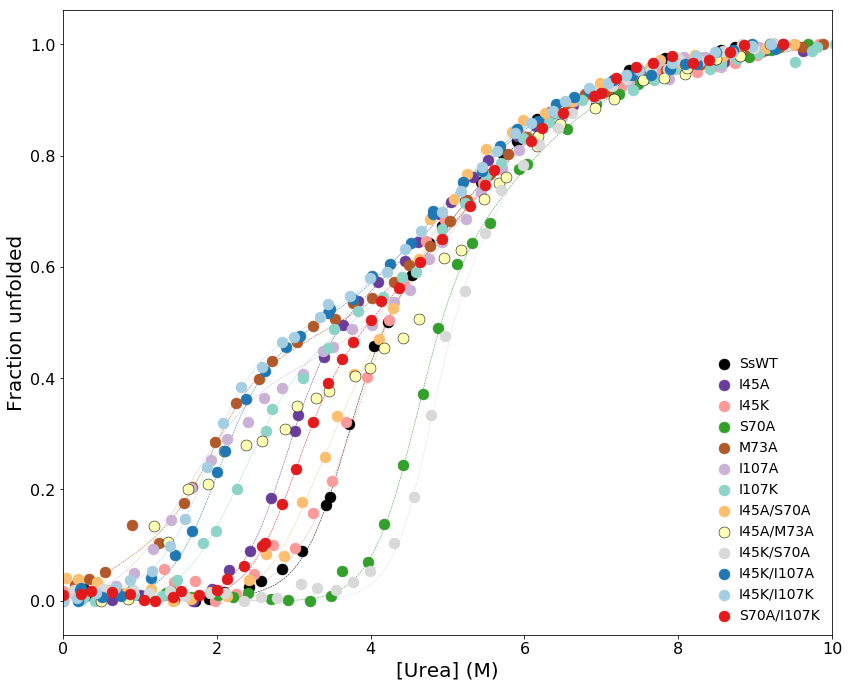

In [10]:
### no residuals 
fig = plt.figure(figsize=(figsize["Height"],figsize["Double"])) 
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax1 = plt.subplot(gs[0])
#ax2 = plt.subplot(gs[1])
fig_title = u'Fraction apparent - Urea titration - MRE vs Urea [M]  ' 
#fig.suptitle(fig_title)
plt.subplots_adjust(hspace=5)
#fig_subtitle = str(temp) + '$^\circ$C' + ", 10mM KPi pH 7.2"
#ax1.set_title(fig_subtitle)
ax1.set_xlabel(labeldict["Urea"])
#ax1.set_ylabel(u'\$MRE ^222 ^nm$(deg*cm$\_2*dmol\_-1$' \)', fontsize=16)
ax1.set_ylabel(labeldict["Fapp"])
#ax2.set_xlabel(labeldict["Urea"])
#ax2.set_ylabel('Residual')

for p in sorted_protlist: 	
     if p == "I45A_M73A":
        ax1.plot(urea_model[p], fapp_model[p], ls = "--", lw = 0.5,  c= colordictCat[p], label='_nolegend_', zorder=0)
        ax1.scatter(urea[p], fapp_MREdata[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=p.replace('_', '/'), linewidth='0.5', edgecolor='black')
#         ax1.scatter(urea[p], fapp_MREdata[p], c= "white", marker=markerdict[p], s=sizedict[p], label=p, linewidth='1', edgecolor='black', zorder=1)
#     elif p == "M73A":
#         ax1.plot(urea_model[p], fapp_model[p], ls = "--", lw = 0.5,  c= "black", label='_nolegend_', zorder=0)
#         ax1.scatter(urea[p], fapp_MREdata[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=p, zorder=1, linewidth='0.5', edgecolor='black')
     else:
        ax1.plot(urea_model[p], fapp_model[p], ls = "--", lw = 0.5,  c= colordictCat[p], label='_nolegend_', zorder=0)
        ax1.scatter(urea[p], fapp_MREdata[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=p.replace('_', '/'), linewidth='0.5')
    #ax2.scatter(urea_residual[p], residual[p], c= colordict[p], marker=markerdict[p], s=sizedict[p], linewidth='0.5', edgecolor='black')
#ax1.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
ax1.legend(loc="lower right", scatterpoints = 1, frameon=False,handletextpad=0.05)
ax1.set_xlim([0,10])	
#ax2.set_xlim([0,10])	
#ax2.set_ylim([minvalue-0.001,maxvalue+0.001])	
fig.tight_layout()
fig.subplots_adjust(top = 0.88, right=0.8)
fig.show()
fout3 = 'output/CD-titration/Titration-Fapp-spectra-no-residual.pdf'
fig.savefig(fout3)

In [11]:
def propagateErrorDF(unumpyarray, df, colname):
    unumpyarray = ['{:.6f}'.format(i) for i in unumpyarray]
    tempSeries = pd.Series(unumpyarray, name = colname).apply(str)
    tempDF = pd.DataFrame([ x.split('+/-') for x in tempSeries.tolist() ], columns = [colname, colname + '_err'], index = df.index)
    df = df.join(tempDF) 
    return (df)

In [12]:
gni_list_values = []
gni_err_list_values = []
giu_list_values = []
giu_err_list_values = []
gtotal_list_values = []
gtotal_err_list_values = []
sorted_colorlist = []
    
for p in sorted_protlist:
    gni_list_values.append(gni[p])
    gni_err_list_values.append(gni_err[p])
    giu_list_values.append(giu[p])
    giu_err_list_values.append(giu_err[p])
    gtotal_list_values.append(gtotal[p])
    gtotal_err_list_values.append(gtotal_err[p])
    sorted_colorlist.append(colordictFit[p])


#save as ifloat to propagate uncertainties, variables ending with "_u" = uncertainties format (value, err)
#ddG = dGmut-dGwt, more neg dG is more stable, ddG >0 = less stable than reference
#dGs are neg, but shown without neg sign, so need to multiple values by -1 
#substract mut from wt for equivalent, corrected sign 

In [13]:
ddG = pd.DataFrame(np.column_stack([sorted_protlist, gni_list_values,gni_err_list_values,giu_list_values,giu_err_list_values,gtotal_list_values, gtotal_err_list_values]), columns=['Protein', 'dG_NI', 'dG_NI_err', 'dG_IU', 'dG_IU_err', 'dG_total', 'dG_total_err'])
ddG = ddG.set_index("Protein")

ddG_NI_u = ufloat( ddG["dG_NI"]["SsWT"], ddG["dG_NI_err"]["SsWT"]) - unumpy.uarray(ddG["dG_NI"].values, ddG["dG_NI_err"].values)
ddG_IU_u = ufloat( ddG["dG_IU"]["SsWT"], ddG["dG_IU_err"]["SsWT"]) - unumpy.uarray(ddG["dG_IU"].values, ddG["dG_IU_err"].values)
ddG_total_u = ufloat( ddG["dG_total"]["SsWT"], ddG["dG_total_err"]["SsWT"]) - unumpy.uarray(ddG["dG_total"].values, ddG["dG_total_err"].values)

ddG = propagateErrorDF(ddG_NI_u, ddG, "ddG_NI")
ddG = propagateErrorDF(ddG_IU_u, ddG, "ddG_IU")
ddG = propagateErrorDF(ddG_total_u, ddG, "ddG_total")

ddG = ddG.astype('float')

ddG.to_csv(ddGout, index=True)

ddG

,dG_NI,dG_NI_err,dG_IU,dG_IU_err,dG_total,dG_total_err,ddG_NI,ddG_NI_err,ddG_IU,ddG_IU_err,ddG_total,ddG_total_err
Protein,,,,,,,,,,,,
SsWT,7.012923,0.088782,4.177736,0.244579,11.190659,0.260194,0.000000,0.125556,0.000000,0.345887,0.000000,0.367970
I45A,5.294199,0.062555,4.602300,0.122942,9.896499,0.137942,1.718724,0.108606,-0.424564,0.273740,1.294160,0.294498
I45K,5.266828,0.098302,7.251193,0.748855,12.518021,0.755280,1.746095,0.132460,-3.073457,0.787784,-1.327362,0.798842
S70A,8.543742,0.111201,6.133988,0.664460,14.677731,0.673701,-1.530819,0.142295,-1.956252,0.708043,-3.487072,0.722201
M73A,4.243023,0.184898,5.965681,0.171122,10.208703,0.251932,2.769900,0.205108,-1.787945,0.298499,0.981955,0.362175
I107A,2.012749,0.032345,3.986036,0.098729,5.998784,0.103892,5.000174,0.094490,0.191700,0.263754,5.191874,0.280169
I107K,3.062635,0.040272,4.779801,0.076689,7.842436,0.086620,3.950288,0.097489,-0.602065,0.256320,3.348223,0.274233
I45A_S70A,4.894964,0.140186,4.745395,0.282268,9.640359,0.315162,2.117959,0.165934,-0.567659,0.373489,1.550300,0.408691
I45A_M73A,1.858848,0.232171,6.194152,0.297726,8.053000,0.377550,5.154075,0.248567,-2.016416,0.385305,3.137659,0.458525


In [14]:
def getInteractionEnergy(p):
    mut1, mut2 = p.split("_")
    ## ufloat( value, err )
    double_ni_u = ufloat(ddG["ddG_NI"][p], ddG["ddG_NI_err"][p])
    mut1_ni_u   = ufloat(ddG["ddG_NI"][mut1], ddG["ddG_NI_err"][mut1])
    mut2_ni_u   = ufloat(ddG["ddG_NI"][mut2], ddG["ddG_NI_err"][mut2])
    print mut1, mut2, mut1_ni_u, mut2_ni_u, double_ni_u, mut1_ni_u + mut2_ni_u, double_ni_u-(mut1_ni_u + mut2_ni_u)
    #ddGdouble -(ddGmut1+ddGmut2)
    deltaNI_u = double_ni_u - (mut1_ni_u + mut2_ni_u)
    deltaNI_u = '{:.6f}'.format(deltaNI_u)
    deltaNI, deltaNI_err = deltaNI_u.split("+/-")
    double_iu_u = ufloat(ddG["ddG_IU"][p], ddG["ddG_IU_err"][p])
    mut1_iu_u   = ufloat(ddG["ddG_IU"][mut1], ddG["ddG_IU_err"][mut1])
    mut2_iu_u   = ufloat(ddG["ddG_IU"][mut2], ddG["ddG_IU_err"][mut2])
    deltaIU_u = double_iu_u - (mut1_iu_u + mut2_iu_u)
    deltaIU_u = '{:.6f}'.format(deltaIU_u)
    deltaIU, deltaIU_err = deltaIU_u.split("+/-")
    
    double_total_u = ufloat(ddG["ddG_total"][p], ddG["ddG_total_err"][p])
    mut1_total_u   = ufloat(ddG["ddG_total"][mut1], ddG["ddG_total_err"][mut1])
    mut2_total_u   = ufloat(ddG["ddG_total"][mut2], ddG["ddG_total_err"][mut2])
    deltatotal_u = double_total_u - (mut1_total_u + mut2_total_u)
    deltatotal_u = '{:.6f}'.format(deltatotal_u)
    deltatotal, deltatotal_err = deltaIU_u.split("+/-")
    
    NI = [ddG["ddG_NI"][mut1], ddG["ddG_NI_err"][mut1], ddG["ddG_NI"][mut2], ddG["ddG_NI_err"][mut2], ddG["ddG_NI"][p], ddG["ddG_NI_err"][p], deltaNI, deltaNI_err]
    IU = [ddG["ddG_IU"][mut1], ddG["ddG_IU_err"][mut1], ddG["ddG_IU"][mut2], ddG["ddG_IU_err"][mut2], ddG["ddG_IU"][p], ddG["ddG_IU_err"][p], deltaIU, deltaIU_err]

    Total = [ddG["ddG_total"][mut1], ddG["ddG_total_err"][mut1], ddG["ddG_total"][mut2], ddG["ddG_total_err"][mut2], ddG["ddG_total"][p], ddG["ddG_total_err"][p], deltatotal, deltatotal_err]

    results = [p] + NI + IU + Total
    return (results)

In [15]:
additivity_list = [s for s in ddG.index.values.tolist() if "_" in s]
print additivity_list

['I45A_S70A', 'I45A_M73A', 'I45K_S70A', 'I45K_I107A', 'I45K_I107K', 'S70A_I107K']


In [16]:
additivity = pd.DataFrame(columns=["Protein", 
									"ddG_NI_mut1", "ddG_NI_err_mut1",       "ddG_NI_mut2", "ddG_NI_err_mut2",      "ddG_NI_double", "ddG_NI_err_double","interaction_NI", "interaction_NI_err",
									"ddG_IU_mut1", "ddG_IU_err_mut1",       "ddG_IU_mut2", "ddG_IU_err_mut2",      "ddG_IU_double", "ddG_IU_err_double","interaction_IU", "interaction_IU_err",
									"ddG_total_mut1", "ddG_total_err_mut1", "ddG_total_mut2", "ddG_total_err_mut2" ,"ddG_total_double", "ddG_total_err_double", "interaction_total", "interaction_total_err"  ])

for p in additivity_list:
    results = getInteractionEnergy(p)
    additivity.loc[additivity.shape[0]] = results
additivity = additivity.set_index("Protein")


I45A S70A 1.72+/-0.11 -1.53+/-0.14 2.12+/-0.17 0.19+/-0.18 1.93+/-0.24
I45A M73A 1.72+/-0.11 2.77+/-0.21 5.15+/-0.25 4.49+/-0.23 0.67+/-0.34
I45K S70A 1.75+/-0.13 -1.53+/-0.14 -3.57+/-0.18 0.22+/-0.19 -3.78+/-0.26
I45K I107A 1.75+/-0.13 5.00+/-0.09 3.48+/-0.12 6.75+/-0.16 -3.27+/-0.20
I45K I107K 1.75+/-0.13 3.95+/-0.10 3.37+/-0.11 5.70+/-0.16 -2.33+/-0.20
S70A I107K -1.53+/-0.14 3.95+/-0.10 1.62+/-0.11 2.42+/-0.17 -0.80+/-0.21


In [17]:
combinedTable = pd.DataFrame() 
combinedTable["dG_NI_plus_err"] = ddG["dG_NI"].round(2).map(str) + u'\u00B1' + ddG["dG_NI_err"].round(2).map(str)
combinedTable["dG_IU_plus_err"] = ddG["dG_IU"].round(2).map(str) + u'\u00B1' + ddG["dG_IU_err"].round(2).map(str)
combinedTable["dG_total_plus_err"] = ddG["dG_total"].round(2).map(str) + u'\u00B1' + ddG["dG_total_err"].round(2).map(str)
combinedTable["ddG_NI_plus_err"] = ddG["ddG_NI"].round(2).map(str) + u'\u00B1' + ddG["ddG_NI_err"].round(2).map(str)
combinedTable["ddG_IU_plus_err"] = ddG["ddG_IU"].round(2).map(str) + u'\u00B1' + ddG["ddG_IU_err"].round(2).map(str)
combinedTable["ddG_total_plus_err"] = ddG["ddG_total"].round(2).map(str) + u'\u00B1' + ddG["ddG_total_err"].round(2).map(str)
combinedTable["interaction_NI_plus_err"] = additivity["interaction_NI"].astype(float).round(2).map(str) + u'\u00B1' + additivity["interaction_NI_err"].astype(float).round(2).map(str)
combinedTable["interaction_IU_plus_err"] = additivity["interaction_IU"].astype(float).round(2).map(str) + u'\u00B1' + additivity["interaction_IU_err"].astype(float).round(2).map(str)
combinedTable["interaction_total_plus_err"] = additivity["interaction_total"].astype(float).round(2).map(str) + u'\u00B1' + additivity["interaction_total_err"].astype(float).round(2).map(str)
combinedTable = combinedTable.reindex(sorted(combinedTable.index, key=lambda x: orderdict[x]))
combinedTable['ddG_NI_plus_err']['SsWT'] = "-"
combinedTable['ddG_IU_plus_err']['SsWT'] = "-"
combinedTable['ddG_total_plus_err']['SsWT'] = "-"

combinedTable = combinedTable.fillna('-')

combinedTable.columns = ["dG_NI", "dG_IU", "dG_Total", "ddG_NI", "ddG_IU", "ddG_Total", "interaction_NI", "interaction_IU", "interaction_Total"]

combinedTable.to_csv(combinedout, encoding='utf-8-sig', index=True)
combinedTable

,dG_NI,dG_IU,dG_Total,ddG_NI,ddG_IU,ddG_Total,interaction_NI,interaction_IU,interaction_Total
Protein,,,,,,,,,
SsWT,7.01±0.09,4.18±0.24,11.19±0.26,-,-,-,-,-,-
I45A,5.29±0.06,4.6±0.12,9.9±0.14,1.72±0.11,-0.42±0.27,1.29±0.29,-,-,-
I45K,5.27±0.1,7.25±0.75,12.52±0.76,1.75±0.13,-3.07±0.79,-1.33±0.8,-,-,-
S70A,8.54±0.11,6.13±0.66,14.68±0.67,-1.53±0.14,-1.96±0.71,-3.49±0.72,-,-,-
M73A,4.24±0.18,5.97±0.17,10.21±0.25,2.77±0.21,-1.79±0.3,0.98±0.36,-,-,-
I107A,2.01±0.03,3.99±0.1,6.0±0.1,5.0±0.09,0.19±0.26,5.19±0.28,-,-,-
I107K,3.06±0.04,4.78±0.08,7.84±0.09,3.95±0.1,-0.6±0.26,3.35±0.27,-,-,-
I45A_S70A,4.89±0.14,4.75±0.28,9.64±0.32,2.12±0.17,-0.57±0.37,1.55±0.41,1.93±0.24,1.81±0.85,1.81±0.85
I45A_M73A,1.86±0.23,6.19±0.3,8.05±0.38,5.15±0.25,-2.02±0.39,3.14±0.46,0.67±0.34,0.2±0.56,0.2±0.56


In [18]:
def autolabel(rects, list_values, err):
	for rect, h, e in zip(rects, list_values, err):
		height = h
		if (height >= 0):
			ax.text(rect.get_x() + rect.get_width()/2, height+e+.1, '%.2f' % height, 
                    ha='center', va='bottom', fontsize=14, rotation=90)
		if (height < 0):
			ax.text(rect.get_x() + rect.get_width()/2, height-e+-.1, '%.2f' % height, 
                    ha='center', va='top', fontsize=14, rotation=90)

## Supplementary Fig 1 - top ##

output/CD-titration/Titration-bargraph-dG.pdf


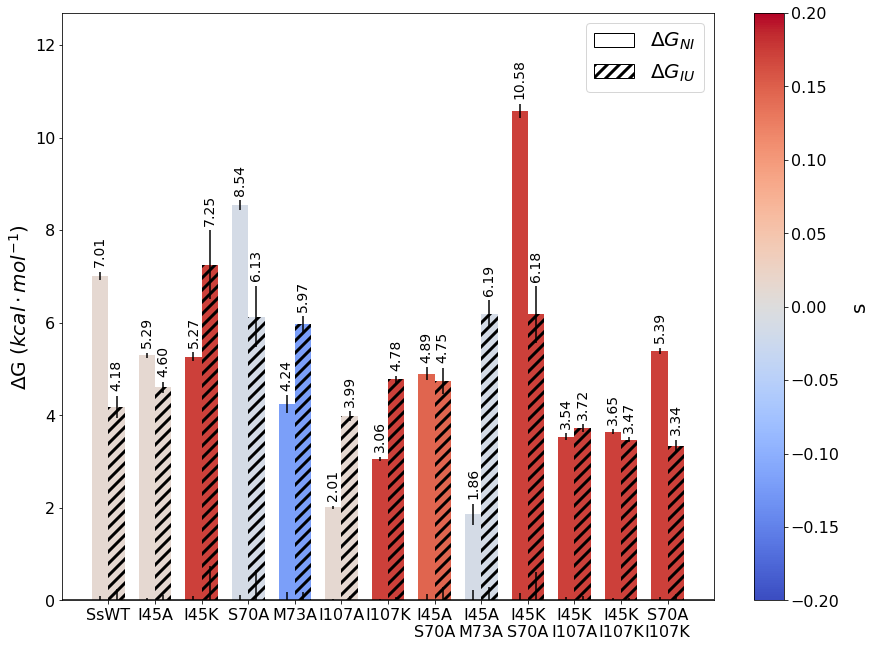

In [19]:


####---bargraph for dG(ni) and dG(iu)				
#for bargraph change WT color to white 
combined_list_values = gni_list_values + giu_list_values
sorted_colorlist_Gni = ["white" if x=="black" else x for x in sorted_colorlist]
sorted_colorlist_Giu = ["white" if x=="black" else x for x in sorted_colorlist]
N = len(sorted_protlist)
labels = [w.replace('_', '\n') for w in sorted_protlist]
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(figsize["Height"],figsize["Double"])) 
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])
rects0a = ax.bar(ind, N*[0], width, color="white", yerr=gni_err_list_values,edgecolor='black' ) #,edgecolor='black'
rects0b = ax.bar(ind + width, N*[0], width, color="white", yerr=giu_err_list_values, hatch='//',edgecolor='black')


rects1 = ax.bar(ind, gni_list_values, width, color=sorted_colorlist_Gni, yerr=gni_err_list_values) #,edgecolor='black'
plt.rcParams['hatch.linewidth'] = 3
rects2 = ax.bar(ind + width, giu_list_values, width, color=sorted_colorlist_Giu, yerr=giu_err_list_values, hatch='//')
# add some text for labels, title and axes ticks
ax.set_ylabel(u'\u0394G ' + r'$(kcal \cdot mol^{-1})$')
#ax.set_title(u'\u0394G ' + ' folding free energy')
ax.set_xticks(ind + width / 2)
ax.tick_params(axis='both') 
ax.set_xticklabels(labels)
ax.set_ylim([0, max(combined_list_values)*1.2])
ax.legend((rects0a[0], rects0b[0]), (u'$\u0394G_{NI}$', u'$\u0394G_{IU}$'),  prop={'size': 20})
autolabel(rects1, gni_list_values,gni_err_list_values)
autolabel(rects2, giu_list_values,giu_err_list_values)
ax.axhline(y=0, color = "black")

cmap = mpl.cm.get_cmap("coolwarm")
norm = mpl.colors.Normalize(vmin= -0.2, vmax=0.2)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
cbar = plt.colorbar(m)
cbar.set_label('s', rotation=90,labelpad=10)

fig.show()
print (dGplotout)
fig.savefig(dGplotout)

In [20]:
####---bargraph for ddG(ni) and ddG(iu)	

ddG = ddG.filter(regex='ddG')
ddG = ddG.drop('SsWT', axis=0)
ddG["Prot"] = ddG.index
ddG['color'] = ddG["Prot"].map(colordictFit)
ddG['ddG_NI_plus'] = ddG["ddG_NI"]+ddG["ddG_NI_err"]
ddG['ddG_NI_minus'] = ddG["ddG_NI"]-ddG["ddG_NI_err"]
ddG['ddG_IU_plus'] = ddG["ddG_IU"]+ddG["ddG_IU_err"]
ddG['ddG_IU_minus'] = ddG["ddG_IU"]-ddG["ddG_IU_err"]
sorted_protlist = ddG["Prot"].tolist()
labels = [w.replace('_', '\n') for w in sorted_protlist]
sorted_colorlist = ddG['color'].tolist()
sorted_colorlist_Giu = ["white" if x=="black" else x for x in sorted_colorlist]
ddgni_list_values =  ddG['ddG_NI'].tolist()
ddgni_err_list_values =  ddG['ddG_NI_err'].tolist()
ddgiu_list_values =  ddG['ddG_IU'].tolist()
ddgiu_err_list_values =  ddG['ddG_IU_err'].tolist()
## use to get max/min values of y-axis
combined_list_values =  ddG['ddG_NI_plus'].tolist() + ddG['ddG_NI_minus'].tolist() + ddG['ddG_IU_plus'].tolist() + ddG['ddG_IU_minus'].tolist() 
ddgtotal_list_values =  ddG['ddG_total'].tolist()

In [21]:
## Supplementary Fig 1 - bottom ##

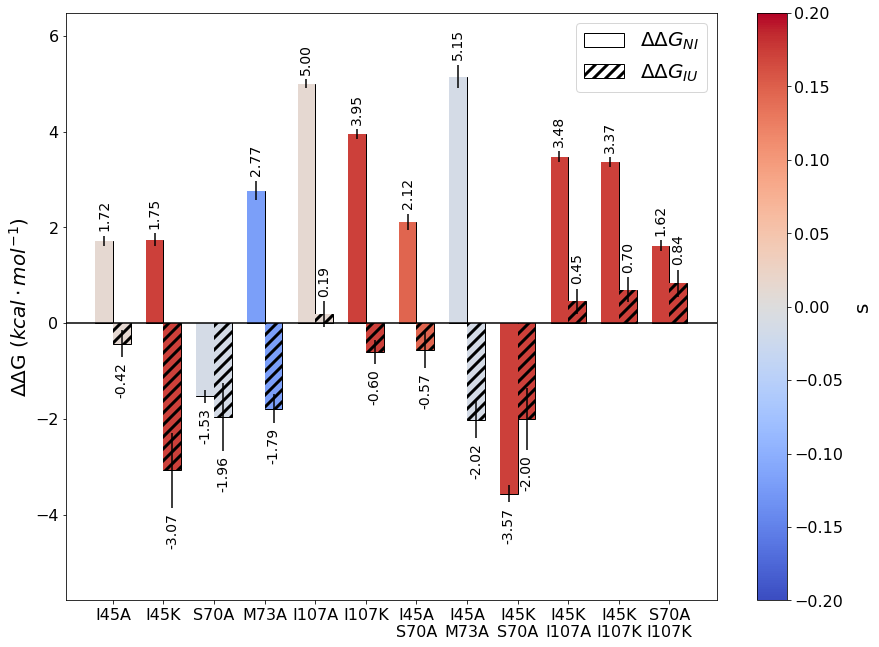

In [22]:
N = len(sorted_protlist)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(figsize["Height"],figsize["Double"]))
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])
##dummy plot for legend marker
rects3 = ax.bar(ind, ddgni_list_values, width, color="white",edgecolor='black')
rects4 = ax.bar(ind + width, ddgiu_list_values, width, color="white", edgecolor='black', hatch='//')
rects1 = ax.bar(ind, ddgni_list_values, width, color=sorted_colorlist,  yerr=ddgni_err_list_values)
plt.rcParams['hatch.linewidth'] = 3
rects2 = ax.bar(ind + width, ddgiu_list_values, width, color=sorted_colorlist_Giu, yerr=ddgiu_err_list_values, hatch='//')
# add some text for labels, title and axes ticks
ax.set_ylabel(u'\u0394\u0394G ' + r'$(kcal \cdot mol^{-1})$', fontsize=20)
#ax.set_title(u'\u0394\u0394G ' + r'$(kcal \cdot mol^{-1})$' + ' difference in folding free energy between wild type and mutant')
ax.set_xticks(ind + width / 2)
ax.tick_params(axis='both', labelsize=16) 
ax.set_xticklabels(labels, fontsize=16)
ax.set_ylim([min(combined_list_values)*1.5, max(combined_list_values)*1.2])
autolabel(rects1, ddgni_list_values,ddgni_err_list_values)
autolabel(rects2, ddgiu_list_values,ddgiu_err_list_values)
ax.legend((rects3[0], rects4[0]), (u'$\u0394\u0394G_{NI}$', u'$\u0394\u0394G_{IU}$'),  prop={'size': 20}, loc=1)
ax.axhline(y=0, color = "black")

cmap = mpl.cm.get_cmap("coolwarm")
norm = mpl.colors.Normalize(vmin= -0.2, vmax=0.2)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
cbar = plt.colorbar(m)
cbar.set_label('s', rotation=90,labelpad=10)

fig.show()

In [23]:
print (ddGplotout)
fig.savefig(ddGplotout)

output/CD-titration/Titration-bargraph-ddG.pdf


In [24]:
add = additivity

add['Protein'] = add.index
add = add.apply(pd.to_numeric, errors="ignore")
add.head()

,ddG_NI_mut1,ddG_NI_err_mut1,ddG_NI_mut2,ddG_NI_err_mut2,ddG_NI_double,ddG_NI_err_double,interaction_NI,interaction_NI_err,ddG_IU_mut1,ddG_IU_err_mut1,...,interaction_IU_err,ddG_total_mut1,ddG_total_err_mut1,ddG_total_mut2,ddG_total_err_mut2,ddG_total_double,ddG_total_err_double,interaction_total,interaction_total_err,Protein
Protein,,,,,,,,,,,,,,,,,,,,,
I45A_S70A,1.718724,0.108606,-1.530819,0.142295,2.117959,0.165934,1.930054,0.244084,-0.424564,0.273740,...,0.846022,1.294160,0.294498,-3.487072,0.722201,1.550300,0.408691,1.813157,0.846022,I45A_S70A
I45A_M73A,1.718724,0.108606,2.769900,0.205108,5.154075,0.248567,0.665451,0.340074,-0.424564,0.273740,...,0.559013,1.294160,0.294498,0.981955,0.362175,3.137659,0.458525,0.196093,0.559013,I45A_M73A
I45K_S70A,1.746095,0.132460,-1.530819,0.142295,-3.565959,0.180010,-3.781235,0.264947,-3.073457,0.787784,...,1.245809,-1.327362,0.798842,-3.487072,0.722201,-5.567271,0.680085,3.028396,1.245809,I45K_S70A
I45K_I107A,1.746095,0.132460,5.000174,0.094490,3.477786,0.117695,-3.268483,0.200814,-3.073457,0.787784,...,0.870595,-1.327362,0.798842,5.191874,0.280169,3.932623,0.285689,3.336594,0.870595,I45K_I107A
I45K_I107K,1.746095,0.132460,3.950288,0.097489,3.365985,0.106550,-2.330398,0.195966,-3.073457,0.787784,...,0.865648,-1.327362,0.798842,3.348223,0.274233,4.070199,0.272754,4.379737,0.865648,I45K_I107K


In [25]:
ddgni_list_values =  add['interaction_NI'].astype(float).tolist()
ddgni_err_list_values =  add['interaction_NI_err'].astype(float).tolist()
ddgiu_list_values =  add['interaction_IU'].astype(float).tolist()
ddgiu_err_list_values =  add['interaction_IU_err'].astype(float).tolist()
ddgni_list_values

[1.9300540000000002,
 0.665451,
 -3.7812349999999997,
 -3.2684830000000002,
 -2.3303979999999997,
 -0.798048]

In [26]:
minvalue = min(min(ddgni_list_values), min(ddgiu_list_values))
maxvalue = max(max(ddgni_list_values), max(ddgiu_list_values))
protlist = add['Protein'].tolist()
labels = [w.replace('_', '\n') for w in protlist]

In [27]:
## Figure 4 - b ##

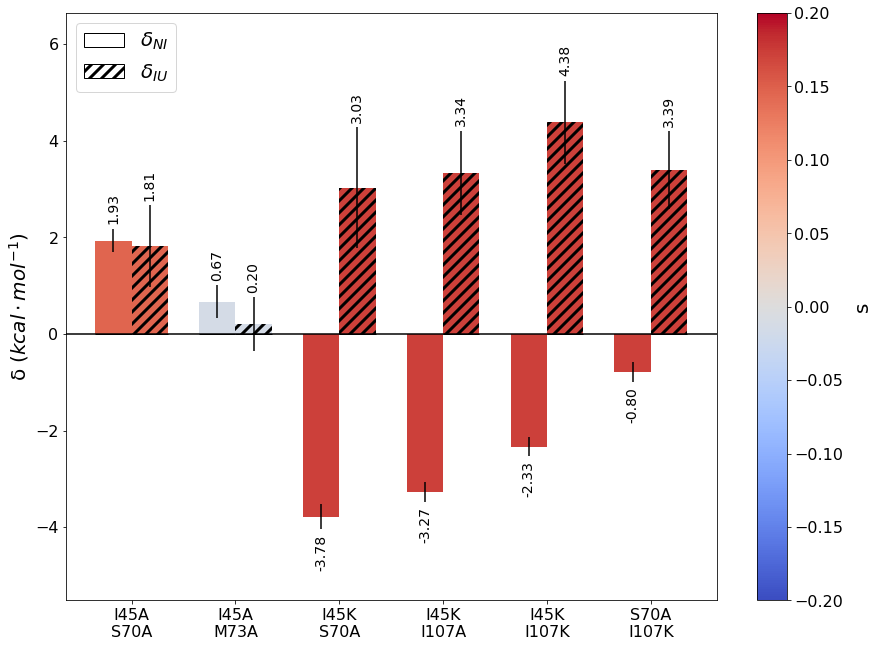

In [28]:
colorlist = []
for p in additivity_list:
    colorlist.append(colordictFit[p])
#mpl.rcParams['hatch.linewidth'] = 3

N = len(additivity_list)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(figsize["Height"],figsize["Double"])) 
#plt.rcParams["patch.force_edgecolor"] = True
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])

##dummy plot for legend marker
rects3 = ax.bar(ind, N*[0], width, color="white",edgecolor='black')
rects4 = ax.bar(ind + width, N*[0], width, color="white", edgecolor='black', hatch='//')


rects1 = ax.bar(ind, ddgni_list_values, width, color=colorlist, yerr=ddgni_err_list_values)
rects2 = ax.bar(ind+width, ddgiu_list_values, width, color=colorlist, yerr=ddgiu_err_list_values)
rects5 = ax.bar(ind+width, ddgiu_list_values, width, color="None", hatch='//')

ddgniTotal = [sum(x) for x in zip(ddgni_list_values, ddgni_err_list_values)] 
ddgiuTotal =  [sum(x) for x in zip(ddgiu_list_values, ddgiu_err_list_values)]
total = ddgniTotal + ddgiuTotal

# add some text for labels, title and axes ticks
ax.set_ylabel(u'\u03B4 ' + r'$(kcal \cdot mol^{-1})$', fontsize=20)
#ax.set_title(u'\u03B4 ' + r'$(kcal \cdot mol^{-1})$' + ' interaction energy of double mutant')
ax.set_xticks(ind + width / 2)
#ax.tick_params(axis='both', labelsize=16) 
ax.set_xticklabels(labels)

ax.set_ylim([min(total) -2, max(total)+1.4])

autolabel(rects1, ddgni_list_values,ddgni_err_list_values)
autolabel(rects2, ddgiu_list_values,ddgiu_err_list_values)

ax.legend((rects3[0], rects4[0]), (u'$\u03B4_{NI}$', u'$\u03B4_{IU}$'),  prop={'size': 20}, loc = 2)
ax.axhline(y=0, color = "black")

cmap = mpl.cm.get_cmap("coolwarm")
norm = mpl.colors.Normalize(vmin= -0.2, vmax=0.2)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
cbar = plt.colorbar(m)
cbar.set_label('s', rotation=90,labelpad=10)

In [29]:
print (addplotout)
fig.savefig(addplotout)

output/CD-titration/Titration-bargraph-additivity.pdf
